<a href="https://colab.research.google.com/github/chaseScallons/Regression-Analysis-Test/blob/main/Regression_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
  # Import dependencies
import tensorflow as tf         # Model Implementation
import pandas as pd             # Data Analysis
import numpy as np              # Linear Algebra
import matplotlib.pyplot as plt # Visualization
print(tf.__version__)

2.9.2


In [2]:
# Initialize feature space
X = tf.range(-100, 100, 4)

# Initialize label space
y = X + 10

# Cross-validation
X_train = X[:40] # First 40 samples are training samples --> %80 of data
y_train = y[:40]

X_test = X[40:]  # Last 10 samples are testing samples --> %20 of data
y_test = y[40:]


# Building the ML model


In [3]:
# 1. Create the model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # 1 Hidden layer, 1 Neuron
])

In [4]:
from tensorflow.python import metrics

# 2. Compile model
model.compile(loss=tf.keras.losses.mae,            # Loss function is Mean Absolute Error (On average how wrong are the predictions?)
              optimizer=tf.keras.optimizers.SGD(), # Optimizer is Stochtastic Gradient Descent
              metrics=["mae"]) 

In [5]:
from os import name
# Summary of the model
tf.random.set_seed(54)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="Input_layer"),
    tf.keras.layers.Dense(1, name="Output_layer")
], name="Regression_model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.summary()

# Dense == Fully connected
# Trainable Params == X, y

Model: "Regression_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (Dense)         (None, 10)                20        
                                                                 
 Output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 3. Fitting the model to data  
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # Train model on data for 50 cycles
                                                                            # Verbose hides fitting

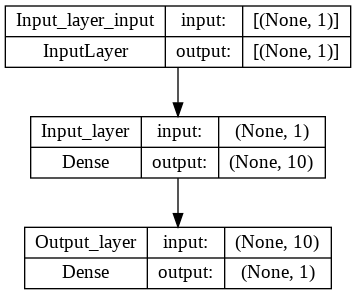

In [7]:
# Visualization of the models layers
from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

# Visualization of the models predictions



In [8]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 90ms/step


array([[17.909472],
       [19.016768],
       [20.124062],
       [21.231358],
       [22.338654],
       [23.445951],
       [24.553247],
       [25.66054 ],
       [26.767838],
       [27.875132]], dtype=float32)

In [9]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions):
  # Visualize split datasets
  plt.figure(figsize=(10, 7))

  # Training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  # Testing data in red
  plt.scatter(test_data, test_labels, c="r", label="Testing Data")

  # Plot predictons in green
  plt.scatter(test_data, predictions, c="g", label="Predictions")

  # Legend
  plt.legend()

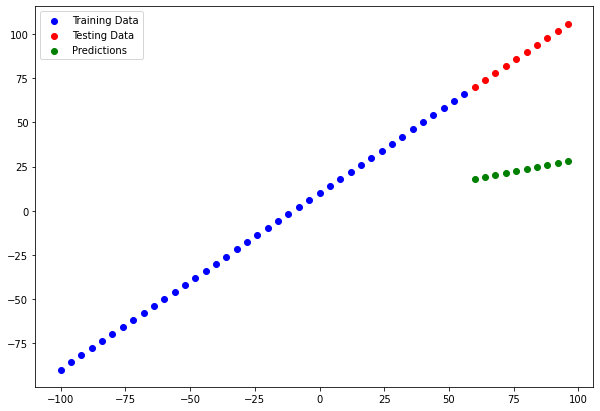

In [10]:
plot_predictions(X_train, y_train, X_test, y_test, y_pred)

# Evaluation Metrics

In [11]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 261ms/step - loss: 65.1077 - mae: 65.1077


[65.10769653320312, 65.10769653320312]

In [34]:
# Computes the MAE; On average, how wrong are the predictions...
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
  # tf.squeeze reduces the dimensionlity of y_pred to match that of y_test
  
# Computes the MSE
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

In [36]:
mae(y_test, y_pred)
mse(y_test, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4308.046>

# Experimentation with models

In [47]:
# Model 1
tf.random.set_seed(34)

# Create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# Fit
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)


1/1 [==============================] - 0s 18ms/step


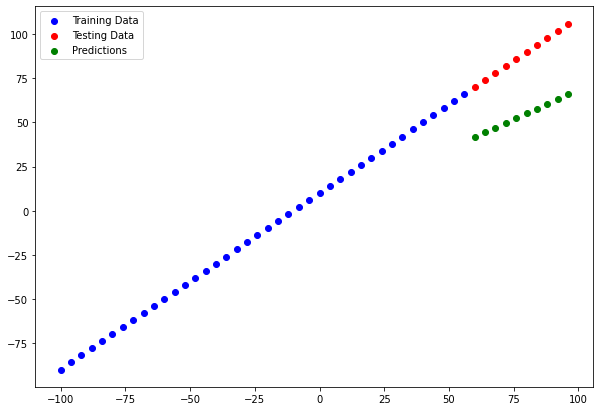

In [49]:
# Predictions
y_pred_1 = model_1.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_1)

In [51]:
# Evaluate
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=34.259052>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1187.878>)

In [53]:
# Model 3
tf.random.set_seed(34)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 47ms/step


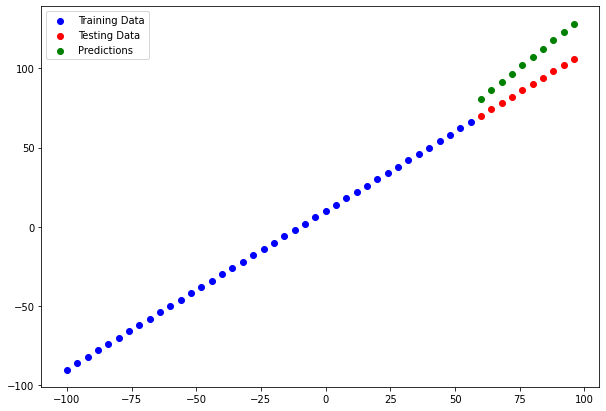

In [54]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(X_train, y_train, X_test, y_test, y_pred_2)

In [58]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=16.463902>,
 <tf.Tensor: shape=(), dtype=float32, numpy=284.23883>)

In [62]:
# Model 3
tf.random.set_seed(34)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)


1/1 [==============================] - 0s 31ms/step


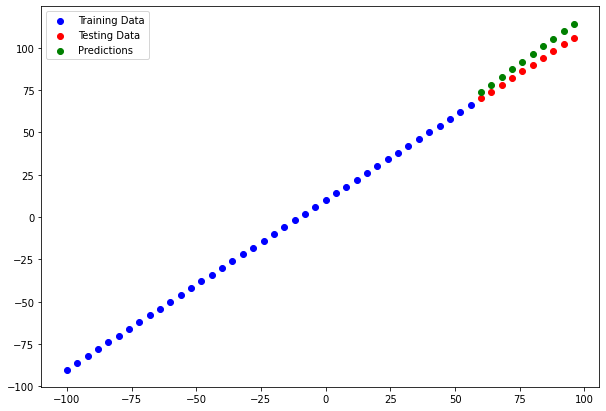

In [64]:
# Predictions
y_pred_3 = model_3.predict(X_test)

plot_predictions(X_train, y_train, X_test, y_test, y_pred_3)

In [66]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=5.9402747>,
 <tf.Tensor: shape=(), dtype=float32, numpy=37.423595>)

# Compating model results

In [72]:
model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,34.259052,1187.878052
1,model_2,16.463902,284.238831
2,model_3,5.940275,37.423595
